In [19]:
from astropy.table import Table
import astropy.cosmology as apc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

```
-- This query does a table JOIN between the imaging (PhotoObj) and spectra
-- (SpecObj) tables and includes the necessary columns in the SELECT to upload
-- the results to the SAS (Science Archive Server) for FITS file retrieval.
SELECT 
   p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
   s.specobjid, s.class, s.z as redshift,
   s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
   p.u BETWEEN 0 AND 19.0
   AND g BETWEEN 0 AND 20.0
```


In [123]:
data = Table.read("Skyserver_SQL3_6_2019 11_13_20 PM.fits")
print(len(data[data['class']=='QSO']))
print(len(data[data['class']=='GALAXY']))
ii_qso = data['class']=='QSO'
ii_gal = data['class']=='GALAXY'
ii_mask = (data['ra']>135) & (data['ra']<225) & (data['dec']>0) & (data['dec']<40) 
ii_filter = data['r']<19.0

30387
191681


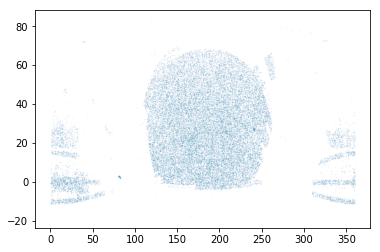

In [124]:
plt.scatter(data['ra'][ii_qso], data['dec'][ii_qso], alpha=0.1, s=0.1)

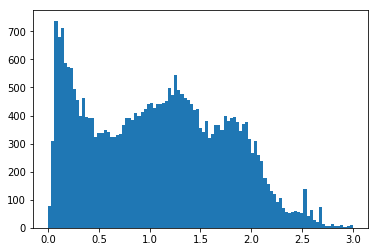

In [107]:
_ = plt.hist(data['redshift'][ii_qso], bins=np.linspace(0.0,3.0, 100))

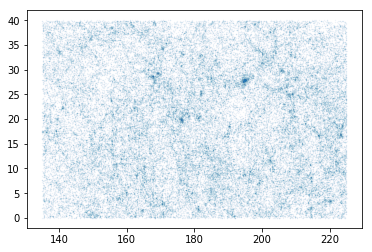

In [109]:
plt.scatter(data['ra'][ii_gal&ii_mask&ii_filter], data['dec'][ii_gal&ii_mask&ii_filter], alpha=0.1, s=0.1)

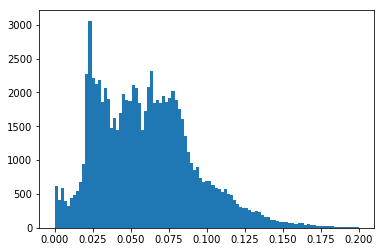

In [110]:
_ = plt.hist(data['redshift'][ii_gal&ii_mask&ii_filter], bins=np.linspace(0.0,0.2, 100))

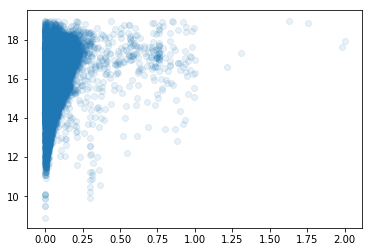

In [112]:
plt.scatter(data['redshift'][ii_gal&ii_filter], data['r'][ii_gal&ii_filter], alpha=0.1)

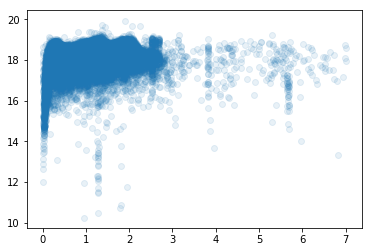

In [92]:
plt.scatter(data['redshift'][ii_qso], data['g'][ii_qso], alpha=0.1)

In [125]:
planck15 = apc.Planck15
z_bins = np.linspace(0.0, 0.2, 100)
distance = planck15.comoving_distance(z_bins)

In [137]:
theta = np.deg2rad(90-data['dec'])
phi = np.deg2rad(data['ra'])
ii_new_mask = (theta>0) & (theta<np.pi/2) & (phi>(np.pi-np.pi/4.0)) & (phi<(np.pi+np.pi/4.0))
gal_data = data[ii_gal & ii_new_mask & ii_filter]
print(len(gal_data))
gal_data['r_comoving'] = planck15.comoving_distance(gal_data['redshift'])
gal_data['theta'] = theta[ii_gal & ii_new_mask & ii_filter]
gal_data['phi'] = phi[ii_gal & ii_new_mask & ii_filter]

117359


In [138]:
gal_data['z_coord'] = gal_data['r_comoving'] * np.cos(gal_data['theta'])
gal_data['y_coord'] = gal_data['r_comoving'] * np.sin(gal_data['theta']) * np.sin(gal_data['phi'])
gal_data['x_coord'] = gal_data['r_comoving'] * np.sin(gal_data['theta']) * np.cos(gal_data['phi'])

(-314.53392342427617,
 140.23162319806931,
 -229.5074643336857,
 225.25808228865978)

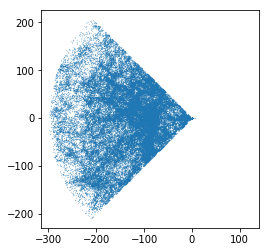

In [139]:
ii_r = gal_data['r_comoving']<300
plt.scatter(gal_data['x_coord'][ii_r], gal_data['y_coord'][ii_r], s=0.01)
plt.axis('square')

(-314.53392342427617,
 22.951104589986528,
 -15.729546936615048,
 321.75548107764763)

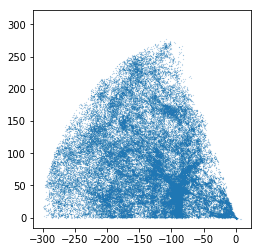

In [140]:
ii_r = gal_data['r_comoving']<300
plt.scatter(gal_data['x_coord'][ii_r], gal_data['z_coord'][ii_r], s=0.01)
plt.axis('square')

In [141]:
np.savetxt('../data/SDSS/SDSS_data_Planck15.txt', gal_data['x_coord', 'y_coord', 'z_coord'][ii_r])